In [19]:
import nbloader
import numpy as np
import matplotlib.pyplot as plt
from util import extract_percent
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
if __name__ == "__main__": 
    print ("Packages loaded.")

Packages loaded.


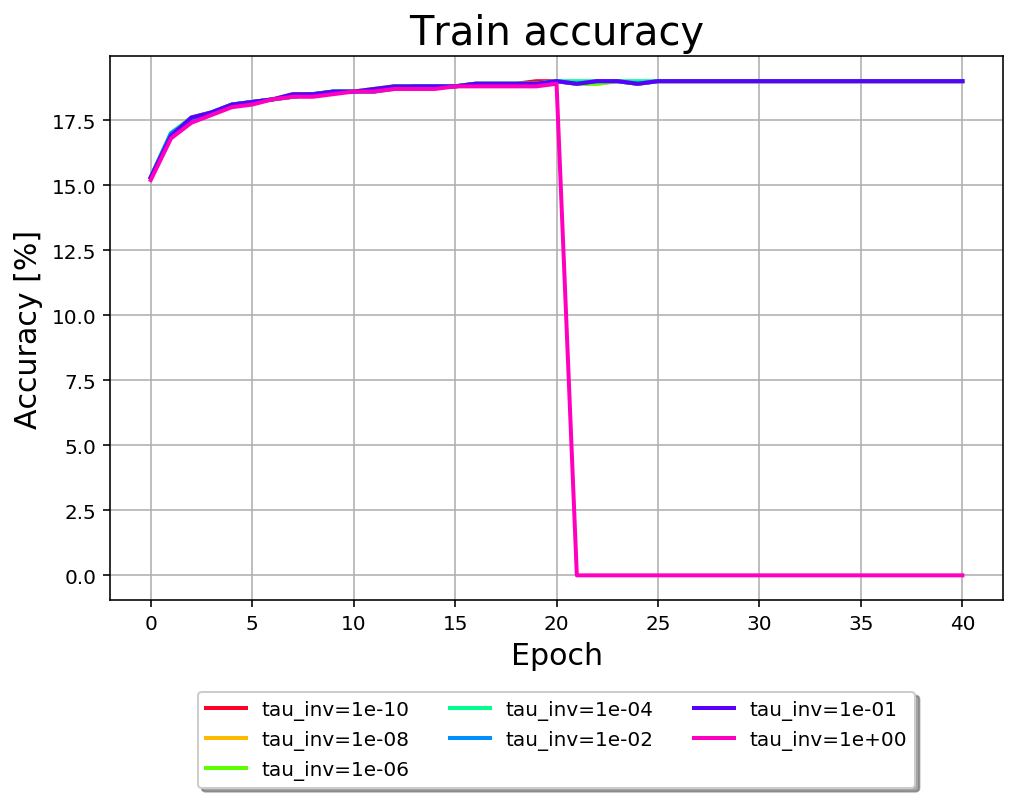

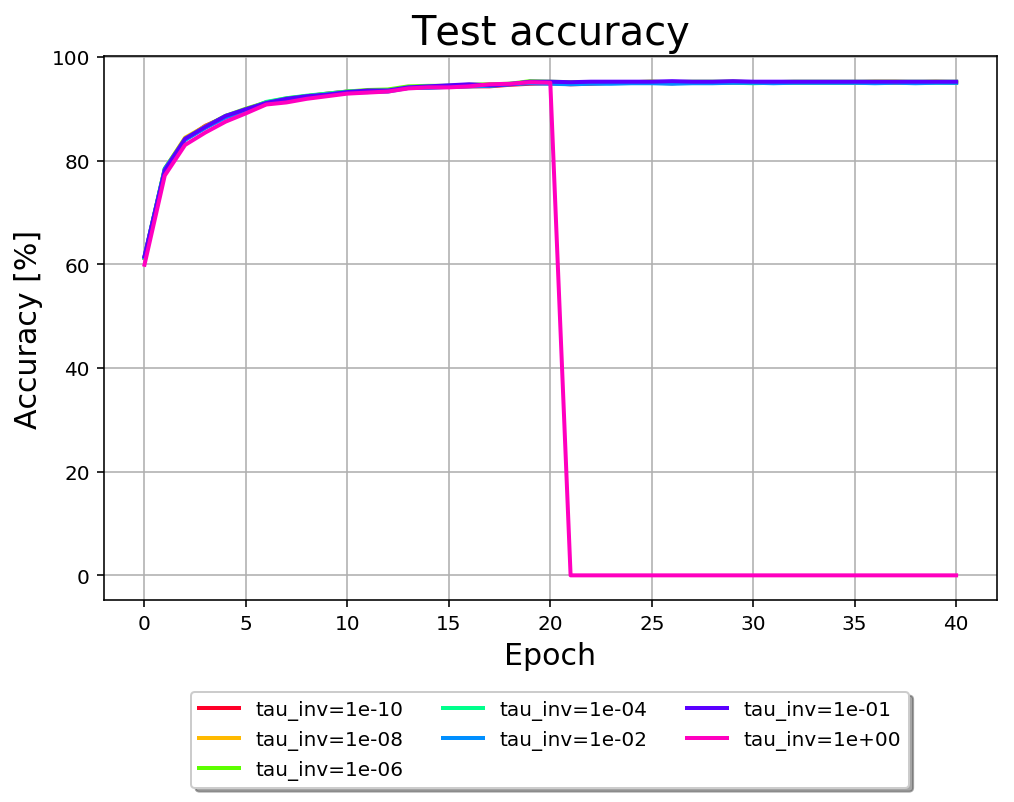

In [36]:
tauInvList = [1e-10,1e-8,1e-6,1e-4,1e-2,1e-1,1e+0]
nConfig = len(tauInvList)
fName = '../res/res_mnist_rs_err90_basic_tau_inv%.0e_choiceNet.txt'%(tauInvList[0])
nEpoch = sum(1 for line in open(fName)) # Number of epochs

trainAccrs = np.zeros(shape=(nConfig,(int)(nEpoch-1)))
testAccrs = np.zeros(shape=(nConfig,(int)(nEpoch-1)))
valAccrs = np.zeros(shape=(nConfig,(int)(nEpoch-1)))
for _tauInvIdx,_tauInv in enumerate(tauInvList):
    if _tauInv < 0.9999:
        fName = '../res/res_mnist_rs_err90_basic_tau_inv%.0e_choiceNet.txt'%(_tauInv)
    else:
        fName = '../res/res_mnist_rs_err90_basic_tau_inv%d_choiceNet.txt'%(_tauInv)
    nEpoch = sum(1 for line in open(fName)) # Number of epochs
    for _lIdx,_eachLine in enumerate(open(fName,'r')): # For each line
        if _lIdx==0: continue
        trainAccr = extract_percent(_eachLine.split(' '),'train')
        testAccr = extract_percent(_eachLine.split(' '),'test')
        valAccr = extract_percent(_eachLine.split(' '),'val')
        trainAccrs[_tauInvIdx,_lIdx-1] = trainAccr
        testAccrs[_tauInvIdx,_lIdx-1] = testAccr
        valAccrs[_tauInvIdx,_lIdx-1] = valAccr
        fNameRfn = fName.replace('../res/res_mnist_','')
        fNameRfn = fNameRfn.replace('.txt','')
        
plt.figure(figsize=(8,5))
cmap = plt.get_cmap('gist_rainbow')
colors = [cmap(i) for i in np.linspace(0,1,nConfig)]
for _i in range(nConfig): # For different configurations
    plt.plot(trainAccrs[_i,:],label='tau_inv=%.0e'%(tauInvList[_i]),
             color=colors[_i],lw=2,ls='-',marker='')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3)
plt.xlabel('Epoch',fontsize=15);plt.ylabel('Accuracy [%]',fontsize=15)
plt.grid(b=True);plt.title('Train accuracy',fontsize=20);plt.show()

plt.figure(figsize=(8,5))
cmap = plt.get_cmap('gist_rainbow')
colors = [cmap(i) for i in np.linspace(0,1,nConfig)]
for _i in range(nConfig): # For different configurations
    plt.plot(testAccrs[_i,:],label='tau_inv=%.0e'%(tauInvList[_i]),
             color=colors[_i],lw=2,ls='-',marker='')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3)
plt.xlabel('Epoch',fontsize=15);plt.ylabel('Accuracy [%]',fontsize=15)
plt.grid(b=True);plt.title('Test accuracy',fontsize=20);plt.show()


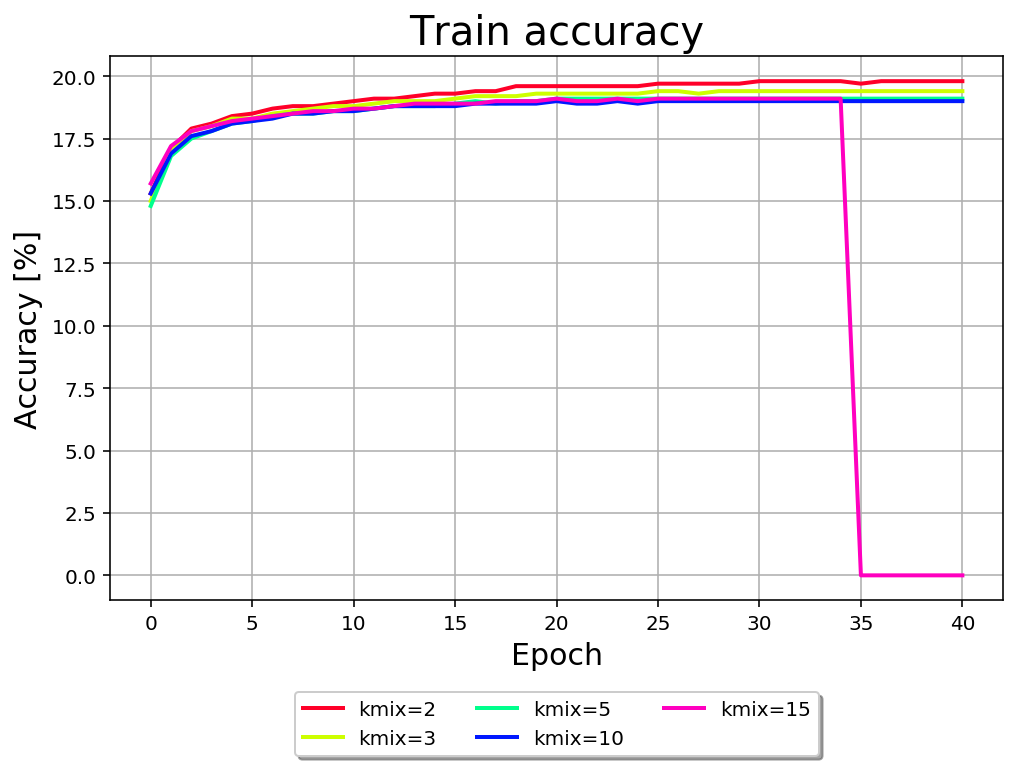

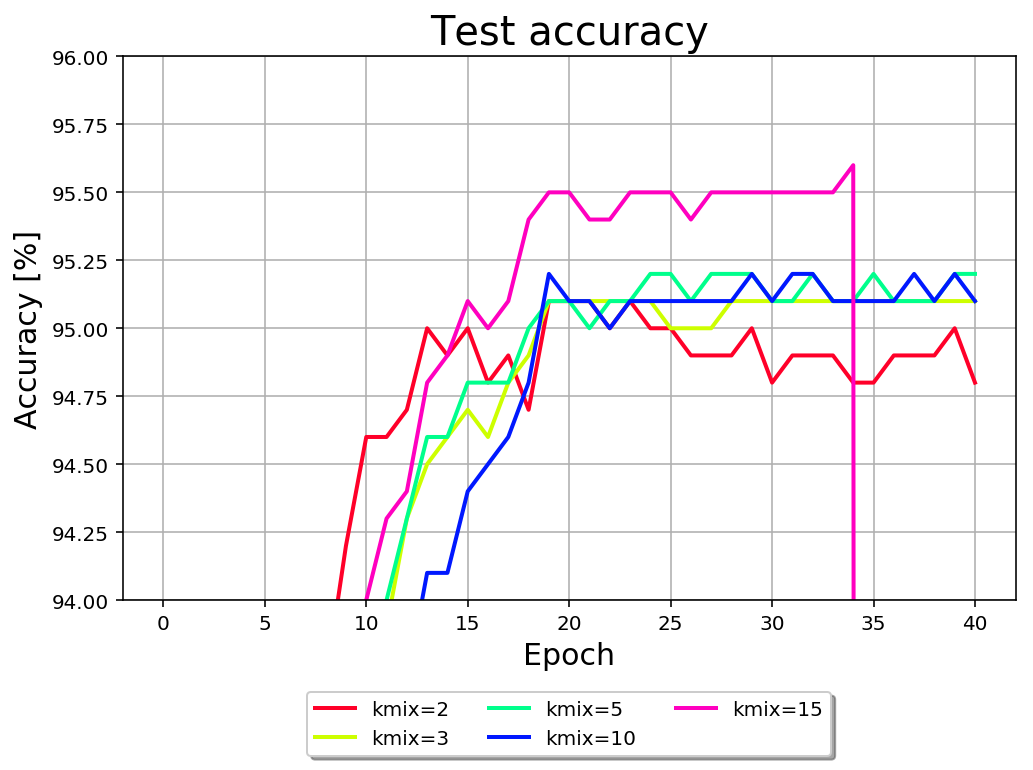

In [39]:
kmixList = [2,3,5,10,15]
nConfig = len(kmixList)
fName = '../res/res_mnist_rs_err90_basic_kmix%d_choiceNet.txt'%(kmixList[0])
nEpoch = sum(1 for line in open(fName)) # Number of epochs

trainAccrs = np.zeros(shape=(nConfig,(int)(nEpoch-1)))
testAccrs = np.zeros(shape=(nConfig,(int)(nEpoch-1)))
valAccrs = np.zeros(shape=(nConfig,(int)(nEpoch-1)))
for _kmixIdx,_kmix in enumerate(kmixList):
    fName = '../res/res_mnist_rs_err90_basic_kmix%d_choiceNet.txt'%(_kmix)
    nEpoch = sum(1 for line in open(fName)) # Number of epochs
    for _lIdx,_eachLine in enumerate(open(fName,'r')): # For each line
        if _lIdx==0: continue
        trainAccr = extract_percent(_eachLine.split(' '),'train')
        testAccr = extract_percent(_eachLine.split(' '),'test')
        valAccr = extract_percent(_eachLine.split(' '),'val')
        trainAccrs[_kmixIdx,_lIdx-1] = trainAccr
        testAccrs[_kmixIdx,_lIdx-1] = testAccr
        valAccrs[_kmixIdx,_lIdx-1] = valAccr
        fNameRfn = fName.replace('../res/res_mnist_','')
        fNameRfn = fNameRfn.replace('.txt','')
        
plt.figure(figsize=(8,5))
cmap = plt.get_cmap('gist_rainbow')
colors = [cmap(i) for i in np.linspace(0,1,nConfig)]
for _i in range(nConfig): # For different configurations
    plt.plot(trainAccrs[_i,:],label='kmix=%d'%(kmixList[_i]),
             color=colors[_i],lw=2,ls='-',marker='')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3)
plt.xlabel('Epoch',fontsize=15);plt.ylabel('Accuracy [%]',fontsize=15)
plt.grid(b=True);plt.title('Train accuracy',fontsize=20);plt.show()

plt.figure(figsize=(8,5))
cmap = plt.get_cmap('gist_rainbow')
colors = [cmap(i) for i in np.linspace(0,1,nConfig)]
for _i in range(nConfig): # For different configurations
    plt.plot(testAccrs[_i,:],label='kmix=%d'%(kmixList[_i]),
             color=colors[_i],lw=2,ls='-',marker='')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3)
plt.xlabel('Epoch',fontsize=15);plt.ylabel('Accuracy [%]',fontsize=15)
plt.grid(b=True);plt.title('Test accuracy',fontsize=20);
plt.ylim([94,96])
plt.show()